In [1]:
import pandas as pd

In [4]:
df_reg_muni = pd.read_csv('regional_to_muni.csv.gz')

df_reg_muni.head()

,geocodigo,uf,id_regional,regional,macroregional_id,macroregional
0,1100189,Rondônia,11002,Cafe,1101,II – CACOAL
1,1100296,Rondônia,11005,Zona Da Mata,1101,II – CACOAL
2,1101476,Rondônia,11002,Cafe,1101,II – CACOAL
3,1301902,Amazonas,13004,Medio Amazonas,1303,LESTE
4,1302702,Amazonas,13003,Rio Madeira,1303,LESTE


In [6]:
df= pd.read_parquet('/Users/eduardoaraujo/Documents/Github/load_infodengue_data/data/cases/PR_chik.parquet', 
                   columns = ['casos', 'municipio_geocodigo'])

df.head()

,casos,municipio_geocodigo
data_iniSE,,
2024-01-07,3,4106555
2024-01-07,2,4119657
2024-01-07,2,4101150
2024-01-07,155,4122404
2024-01-07,36,4113502


In [8]:
df.resample('Y').sum()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_29770/1004694227.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum()


,casos,municipio_geocodigo
data_iniSE,,
2010-12-31,0,85366327592
2011-12-31,0,85366327592
2012-12-31,0,87007987738
2013-12-31,0,85366327592
2014-12-31,5,85366327592
2015-12-31,176,85366327592
2016-12-31,2713,85366327592
2017-12-31,865,87007987738
2018-12-31,616,85366327592


In [12]:
df_reg = df.reset_index().merge(df_reg_muni, right_on = 'geocodigo', left_on = 'municipio_geocodigo')
df_reg.set_index('data_iniSE', inplace = True)
df_reg.head()

,casos,municipio_geocodigo,geocodigo,uf,id_regional,regional,macroregional_id,macroregional
data_iniSE,,,,,,,,
2024-01-07,3,4106555,4106555,Paraná,41011,11a Rs Campo Mourao,4106,NOROESTE
2024-01-07,2,4119657,4119657,Paraná,41017,17a Rs Londrina,4105,NORTE
2024-01-07,2,4101150,4101150,Paraná,41015,15a Rs Maringa,4106,NOROESTE
2024-01-07,155,4122404,4122404,Paraná,41017,17a Rs Londrina,4105,NORTE
2024-01-07,36,4113502,4113502,Paraná,41014,14a Rs Paranavai,4106,NOROESTE


In [16]:
df_reg_chik = df_reg.groupby('id_regional').resample('Y')[['casos']].sum().reset_index()

df_reg_chik.head()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_29770/4065378803.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_reg_chik = df_reg.groupby('id_regional').resample('Y')[['casos']].sum().reset_index()


,id_regional,data_iniSE,casos
0,41001,2010-12-31,0
1,41001,2011-12-31,0
2,41001,2012-12-31,0
3,41001,2013-12-31,0
4,41001,2014-12-31,0


In [19]:
df_reg_chik.sort_values(by = 'casos', ascending = False).head(10)

,id_regional,data_iniSE,casos
270,41017,2024-12-31,153303
158,41010,2024-12-31,86753
126,41008,2024-12-31,77664
238,41015,2024-12-31,69673
30,41002,2024-12-31,65822
254,41016,2024-12-31,58786
318,41020,2024-12-31,52549
142,41009,2024-12-31,50434
174,41011,2024-12-31,46851
46,41003,2024-12-31,43886


In [20]:
df_reg_chik.loc[df_reg_chik.data_iniSE == '2023-12-31'].sort_values(by = 'casos', ascending = False).head(10)

,id_regional,data_iniSE,casos
141,41009,2023-12-31,3066
269,41017,2023-12-31,450
317,41020,2023-12-31,265
157,41010,2023-12-31,215
189,41012,2023-12-31,153
29,41002,2023-12-31,97
125,41008,2023-12-31,86
237,41015,2023-12-31,84
253,41016,2023-12-31,62
13,41001,2023-12-31,53


In [21]:
df_reg_chik.loc[df_reg_chik.data_iniSE == '2021-12-31'].sort_values(by = 'casos', ascending = False).head(10)

,id_regional,data_iniSE,casos
251,41016,2021-12-31,147
139,41009,2021-12-31,52
267,41017,2021-12-31,45
235,41015,2021-12-31,21
11,41001,2021-12-31,15
155,41010,2021-12-31,14
27,41002,2021-12-31,13
219,41014,2021-12-31,7
171,41011,2021-12-31,7
315,41020,2021-12-31,6


In [22]:
df_reg_chik.loc[df_reg_chik.data_iniSE == '2022-12-31'].sort_values(by = 'casos', ascending = False).head(10)

,id_regional,data_iniSE,casos
140,41009,2022-12-31,158
268,41017,2022-12-31,65
236,41015,2022-12-31,53
28,41002,2022-12-31,35
124,41008,2022-12-31,32
156,41010,2022-12-31,31
300,41019,2022-12-31,20
252,41016,2022-12-31,19
220,41014,2022-12-31,17
316,41020,2022-12-31,16


In [23]:
import seaborn as sns

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_29770/3240136974.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sns.barplot(data = df.resample('Y').sum(), x= 'data_iniSE', y = 'casos')


<Axes: xlabel='data_iniSE', ylabel='casos'>

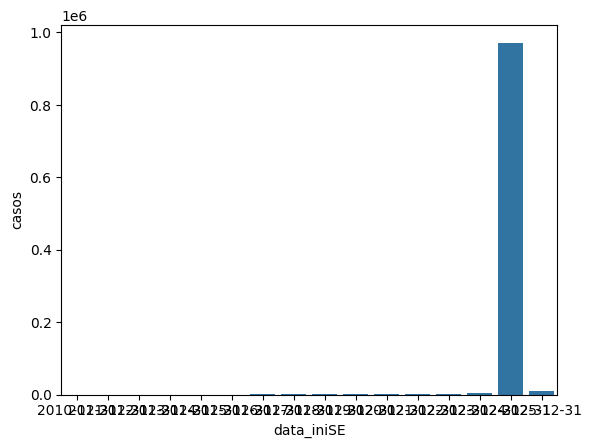

In [25]:
sns.barplot(data = df.resample('Y').sum(), x= 'data_iniSE', y = 'casos')

In [27]:
df.resample('Y').sum()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_29770/1004694227.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum()


,casos,municipio_geocodigo
data_iniSE,,
2010-12-31,0,85366327592
2011-12-31,0,85366327592
2012-12-31,0,87007987738
2013-12-31,0,85366327592
2014-12-31,5,85366327592
2015-12-31,176,85366327592
2016-12-31,2713,85366327592
2017-12-31,865,87007987738
2018-12-31,616,85366327592


In [28]:
3066/4791

0.6399499060738886